In [32]:
import os
import numpy as np
import torch
import json

In [33]:
# initialise arguments
concepts = ['under a tree', 'on the street']
test_name = 'skilled_expert_t_test_expert'
ratio = [0.3, 0.3]
seed = 0
root = f'../results/results_seed_{seed}/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/%s/{test_name}/%s/'
timesteps = 51
n_layers = 16
num_experts_per_layer = [64, 64, 128, 128, 256, 256, 256, 256, 256, 256, 128, 128, 128, 64, 64, 64]

In [34]:
# read data for all concepts
all_concept_data = {}
print("Reading all the data")
for iter, c in enumerate(concepts):
    # read data
    all_concept_data[c] = {}
    for t in range(timesteps):
        all_concept_data[c][t] = {}
        for l in range(n_layers):
            # read data
            path = os.path.join(root % (c, ratio[iter]), f'timestep_{t}_layer_{l}.json')
            with open(path, 'r') as f:
                data = json.load(f)
                all_concept_data[c][t][l] = data

        

Reading all the data


Plotting the number of experts for each concept
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48] 25


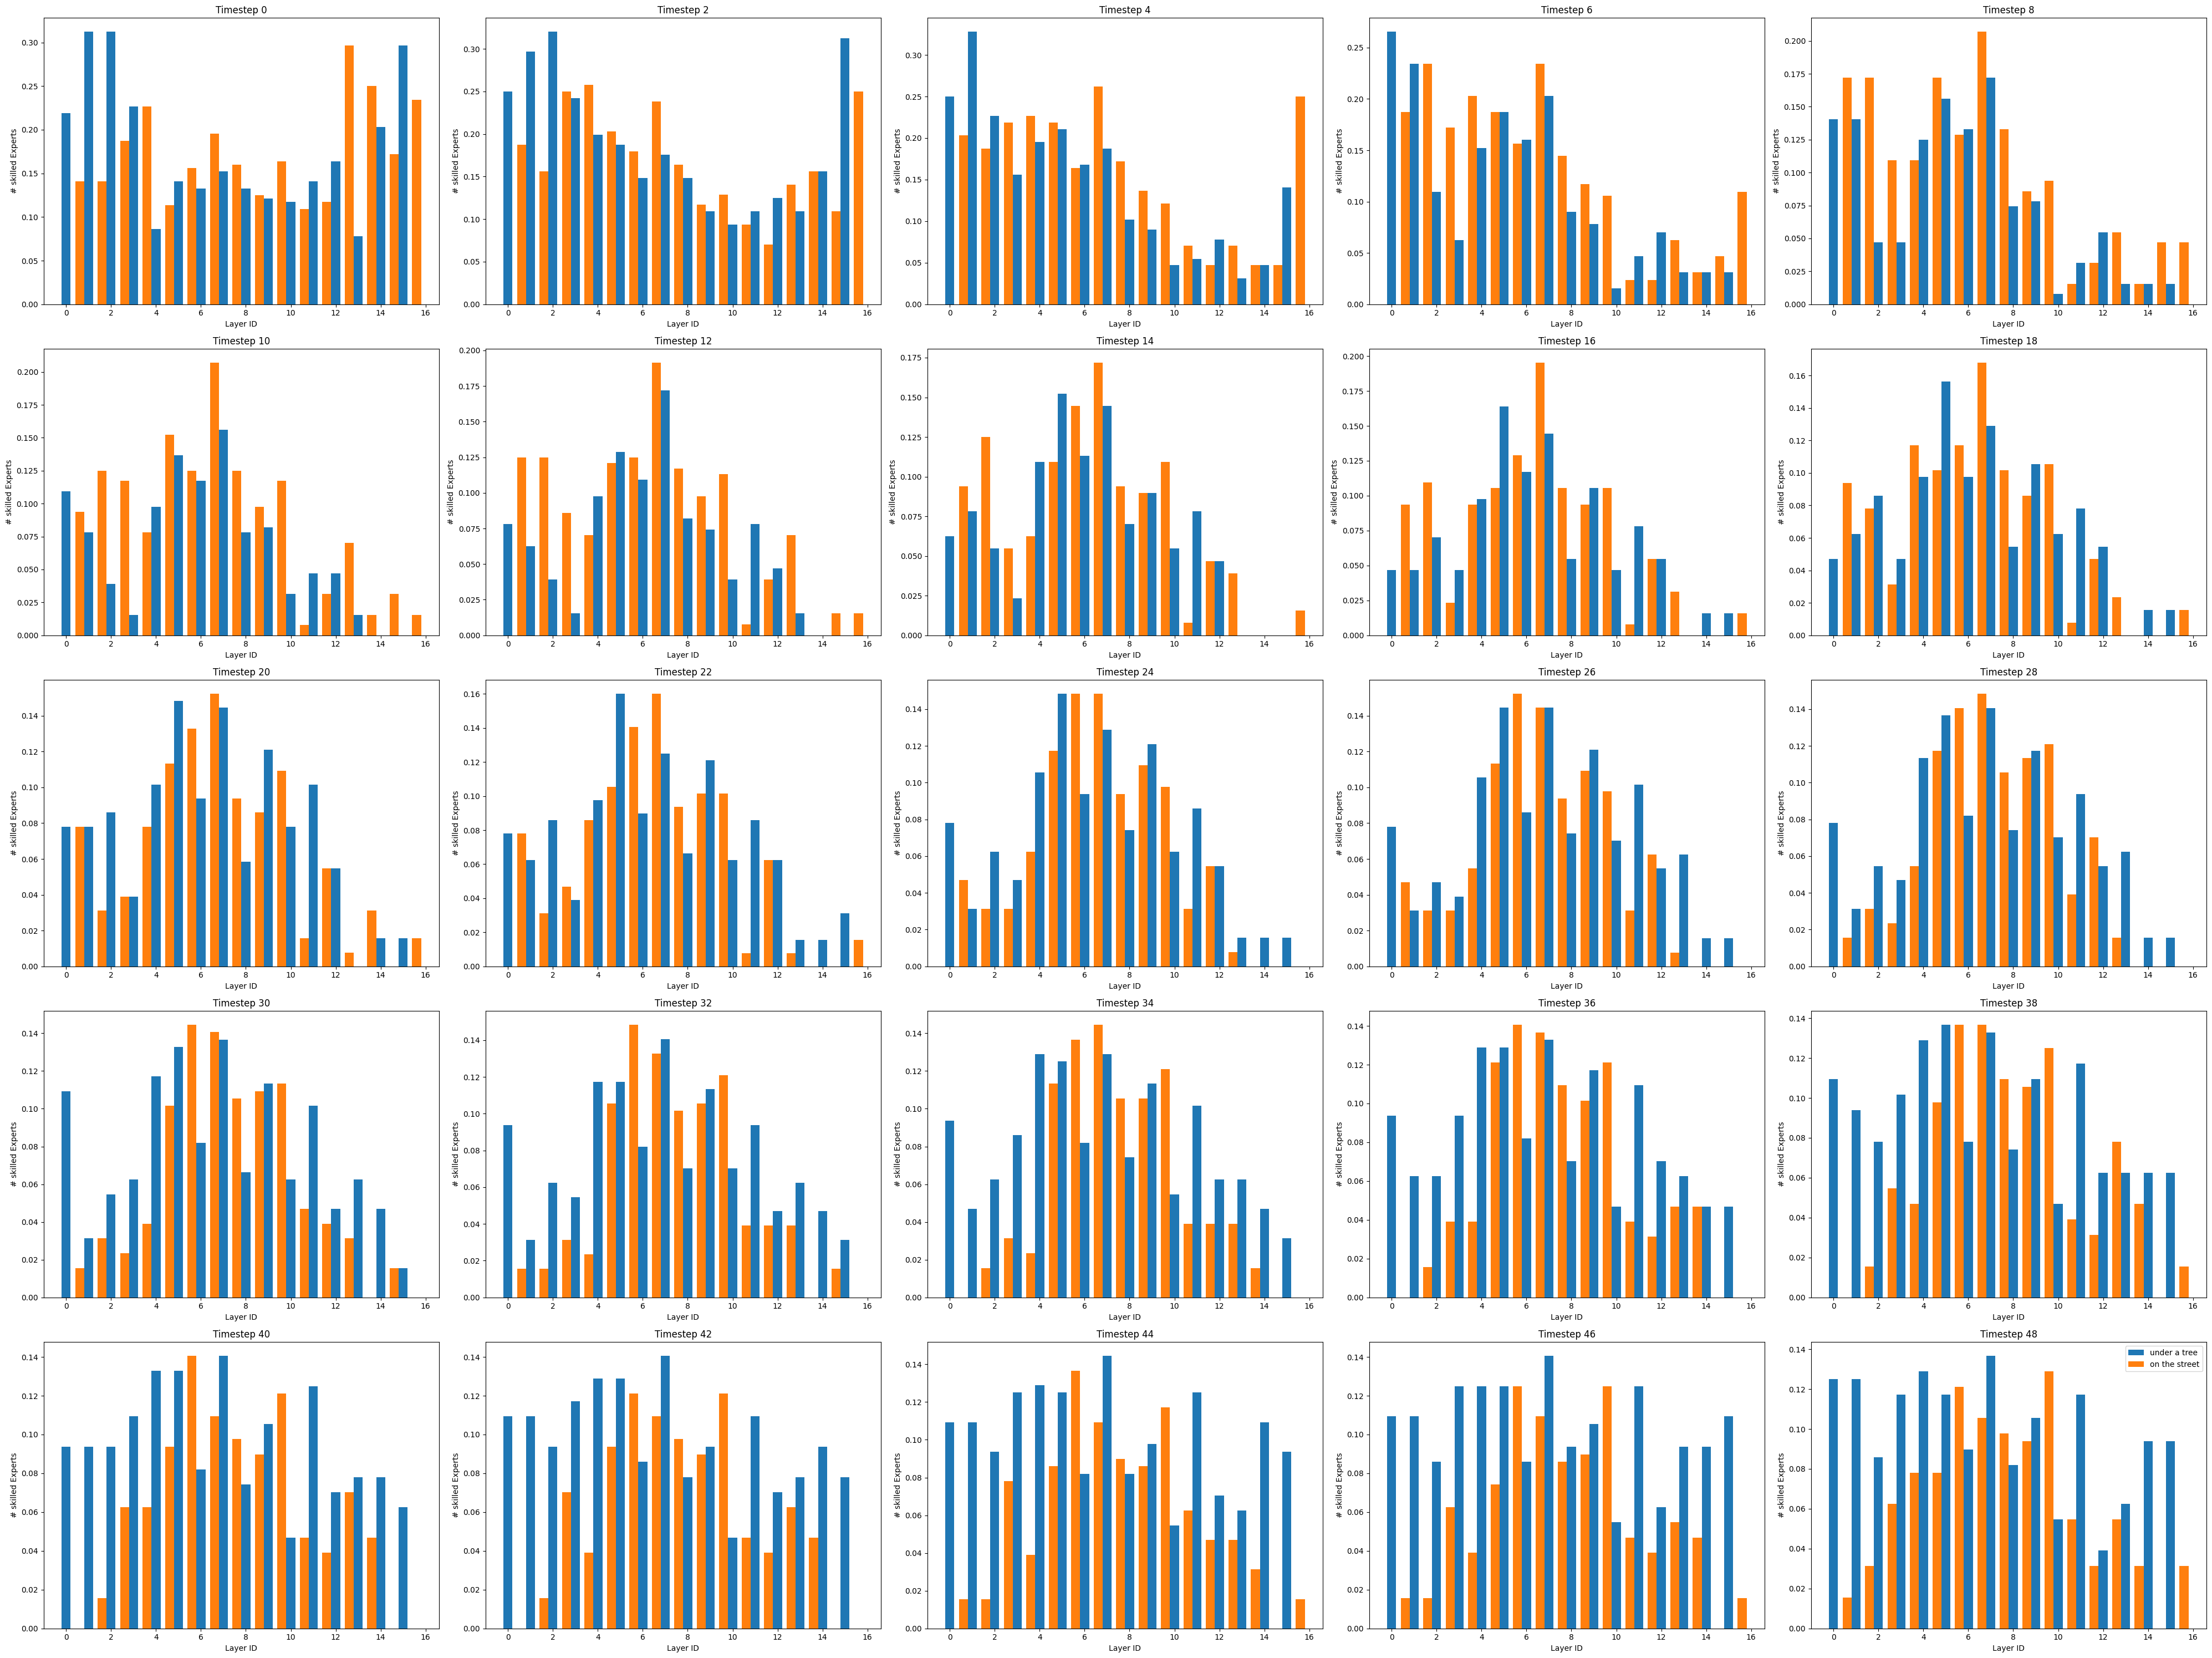

In [35]:
# plot the number of experts for each concept
print("Plotting the number of experts for each concept")
import matplotlib.pyplot as plt
T = np.arange(0, timesteps-1, 2).tolist()
print(T, len(T))
fig, axes = plt.subplots(5, len(T)//5, figsize=(40, 30))
# adjust space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
for c in concepts:
    
    for t in T:
        n_experts = []
        for l in range(n_layers):
            n_experts.append(len(all_concept_data[c][t][l])/num_experts_per_layer[l])
        axes[T.index(t)//5, T.index(t)%5].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
        
        # axes[T.index(t)].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
        # # sjift the next bar
        # # set title
        axes[T.index(t)//5, T.index(t)%5].set_title(f'Timestep {t}')
        axes[T.index(t)//5, T.index(t)%5].set_xlabel('Layer ID')
        axes[T.index(t)//5, T.index(t)%5].set_ylabel('# skilled Experts')
    space += 0.6

plt.legend()
plt.tight_layout()
plt.savefig('skilled_experts.png')
# plot the number of experts for each concept
    # plt.bar(np.arange(n_layers) + space, n_experts, label=c)
    # space += 0.4

Finding the intersection of the experts
Plotting the number of experts for each concept


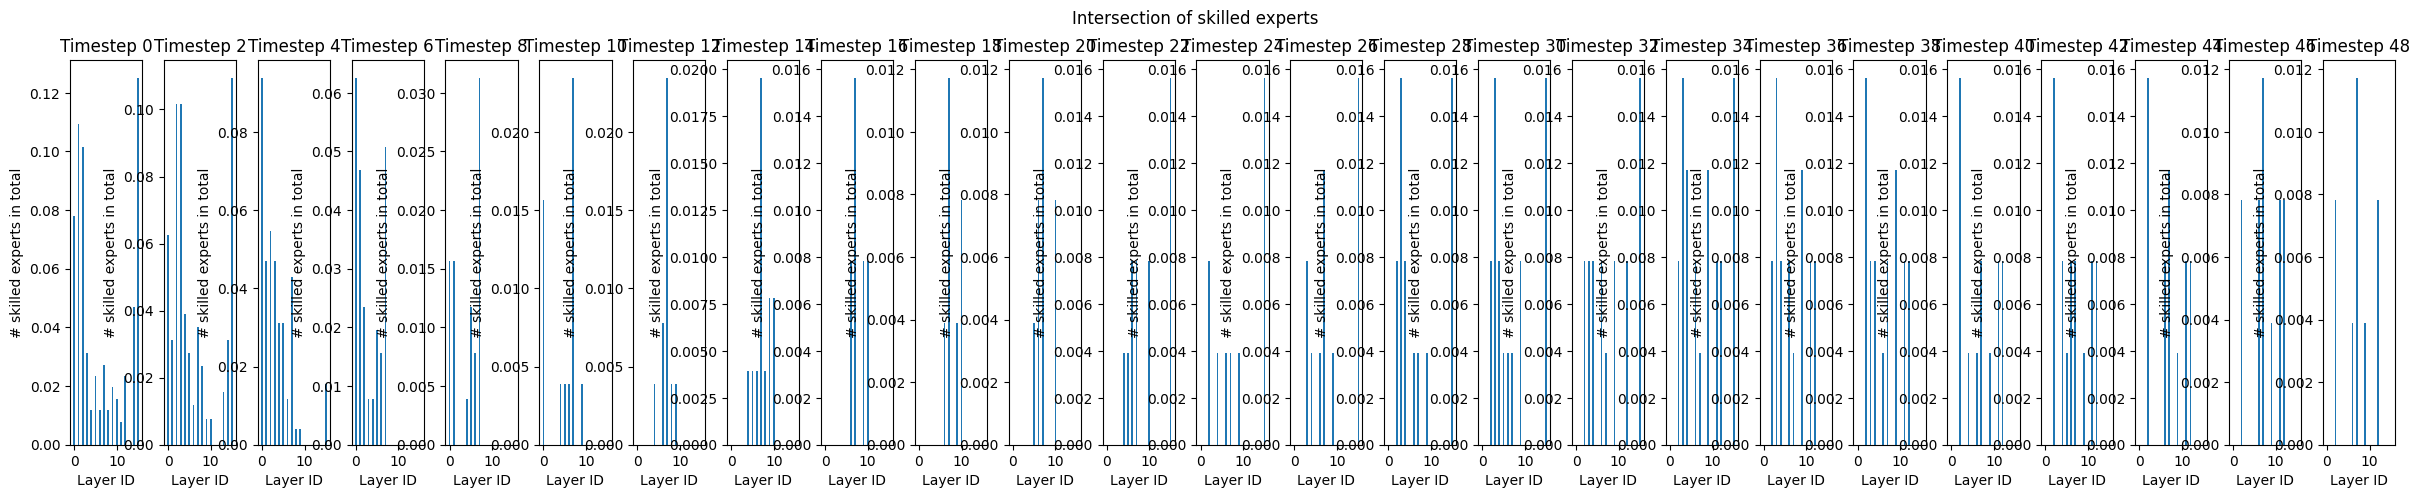

In [27]:
# find the set difference of the experts
print("Finding the intersection of the experts")
intersection = {}
union = {}
for t in range(timesteps):
    intersection[t] = {}
    union[t] = {}
    for l in range(n_layers):
        # find the intersection of the experts
        experts_0 = set(all_concept_data[concepts[0]][t][l])
        experts_1 = set(all_concept_data[concepts[1]][t][l])
        intersection[t][l] = list(experts_1.intersection(experts_0))
        union[t][l] = list(experts_1.union(experts_0))

# plot the number of experts for each concept
print("Plotting the number of experts for each concept")
fig, axes = plt.subplots(1, len(T), figsize=(30, 5))
fig.suptitle('Intersection of skilled experts')
# add space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
# for c in concepts:
for t in T:
    n_experts = []
    for l in range(n_layers):
        n_experts.append(len(intersection[t][l])/num_experts_per_layer[l])
    axes[T.index(t)].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
    # set title
    axes[T.index(t)].set_title(f'Timestep {t}')
    axes[T.index(t)].set_xlabel('Layer ID')
    axes[T.index(t)].set_ylabel('# skilled experts in total')
    # sjift the next bar


plt.show()
# plot the union of the experts


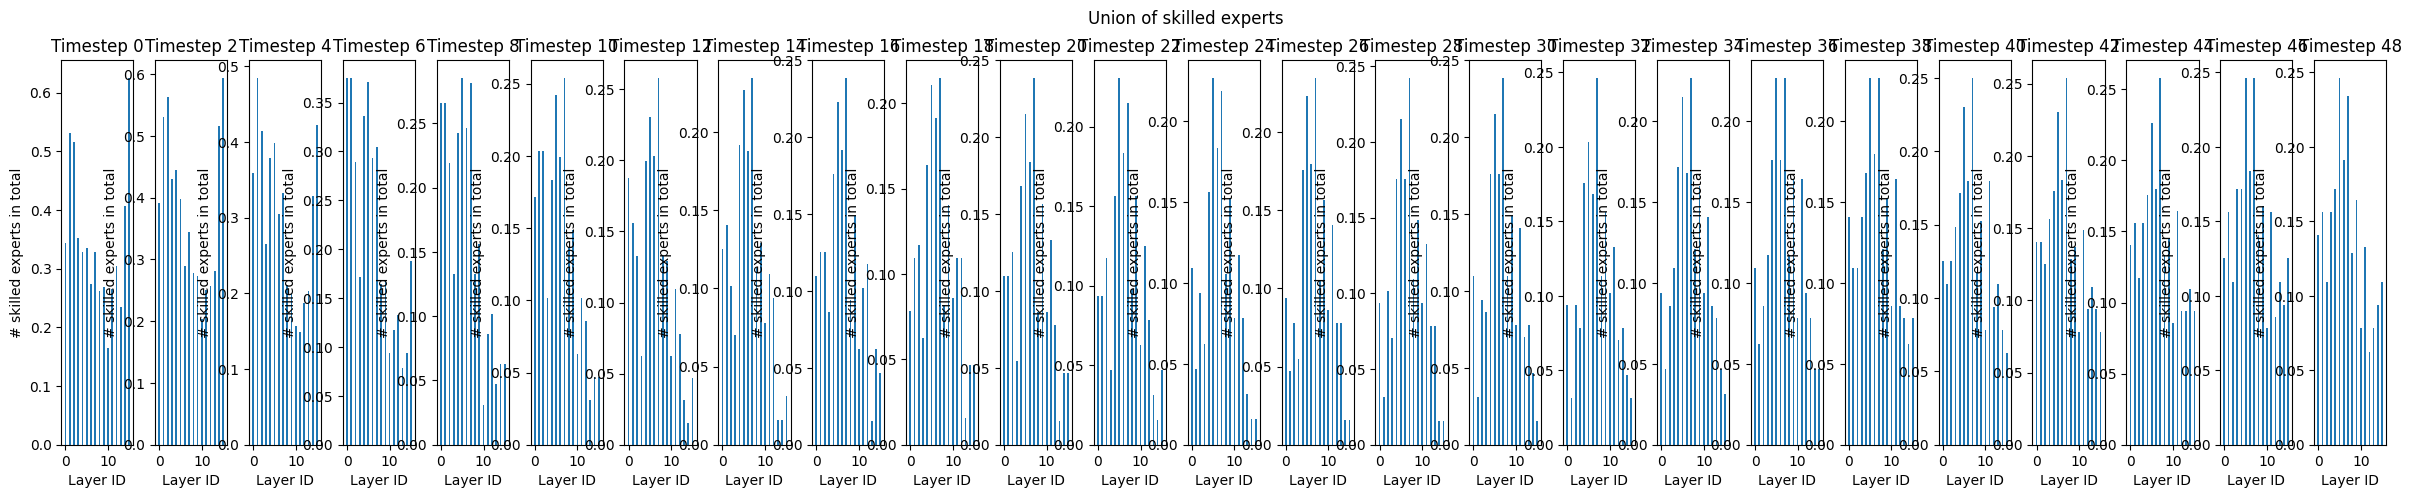

In [28]:
# plot the union of the experts
fig, axes = plt.subplots(1, len(T), figsize=(30, 5))
fig.suptitle('Union of skilled experts')
# add space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
# for c in concepts:
for t in T:
    n_experts = []
    for l in range(n_layers):
        n_experts.append(len(union[t][l])/num_experts_per_layer[l])
    axes[T.index(t)].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
    # set title
    axes[T.index(t)].set_title(f'Timestep {t}')
    axes[T.index(t)].set_xlabel('Layer ID')
    axes[T.index(t)].set_ylabel('# skilled experts in total')
    # sjift the next bar


plt.show()

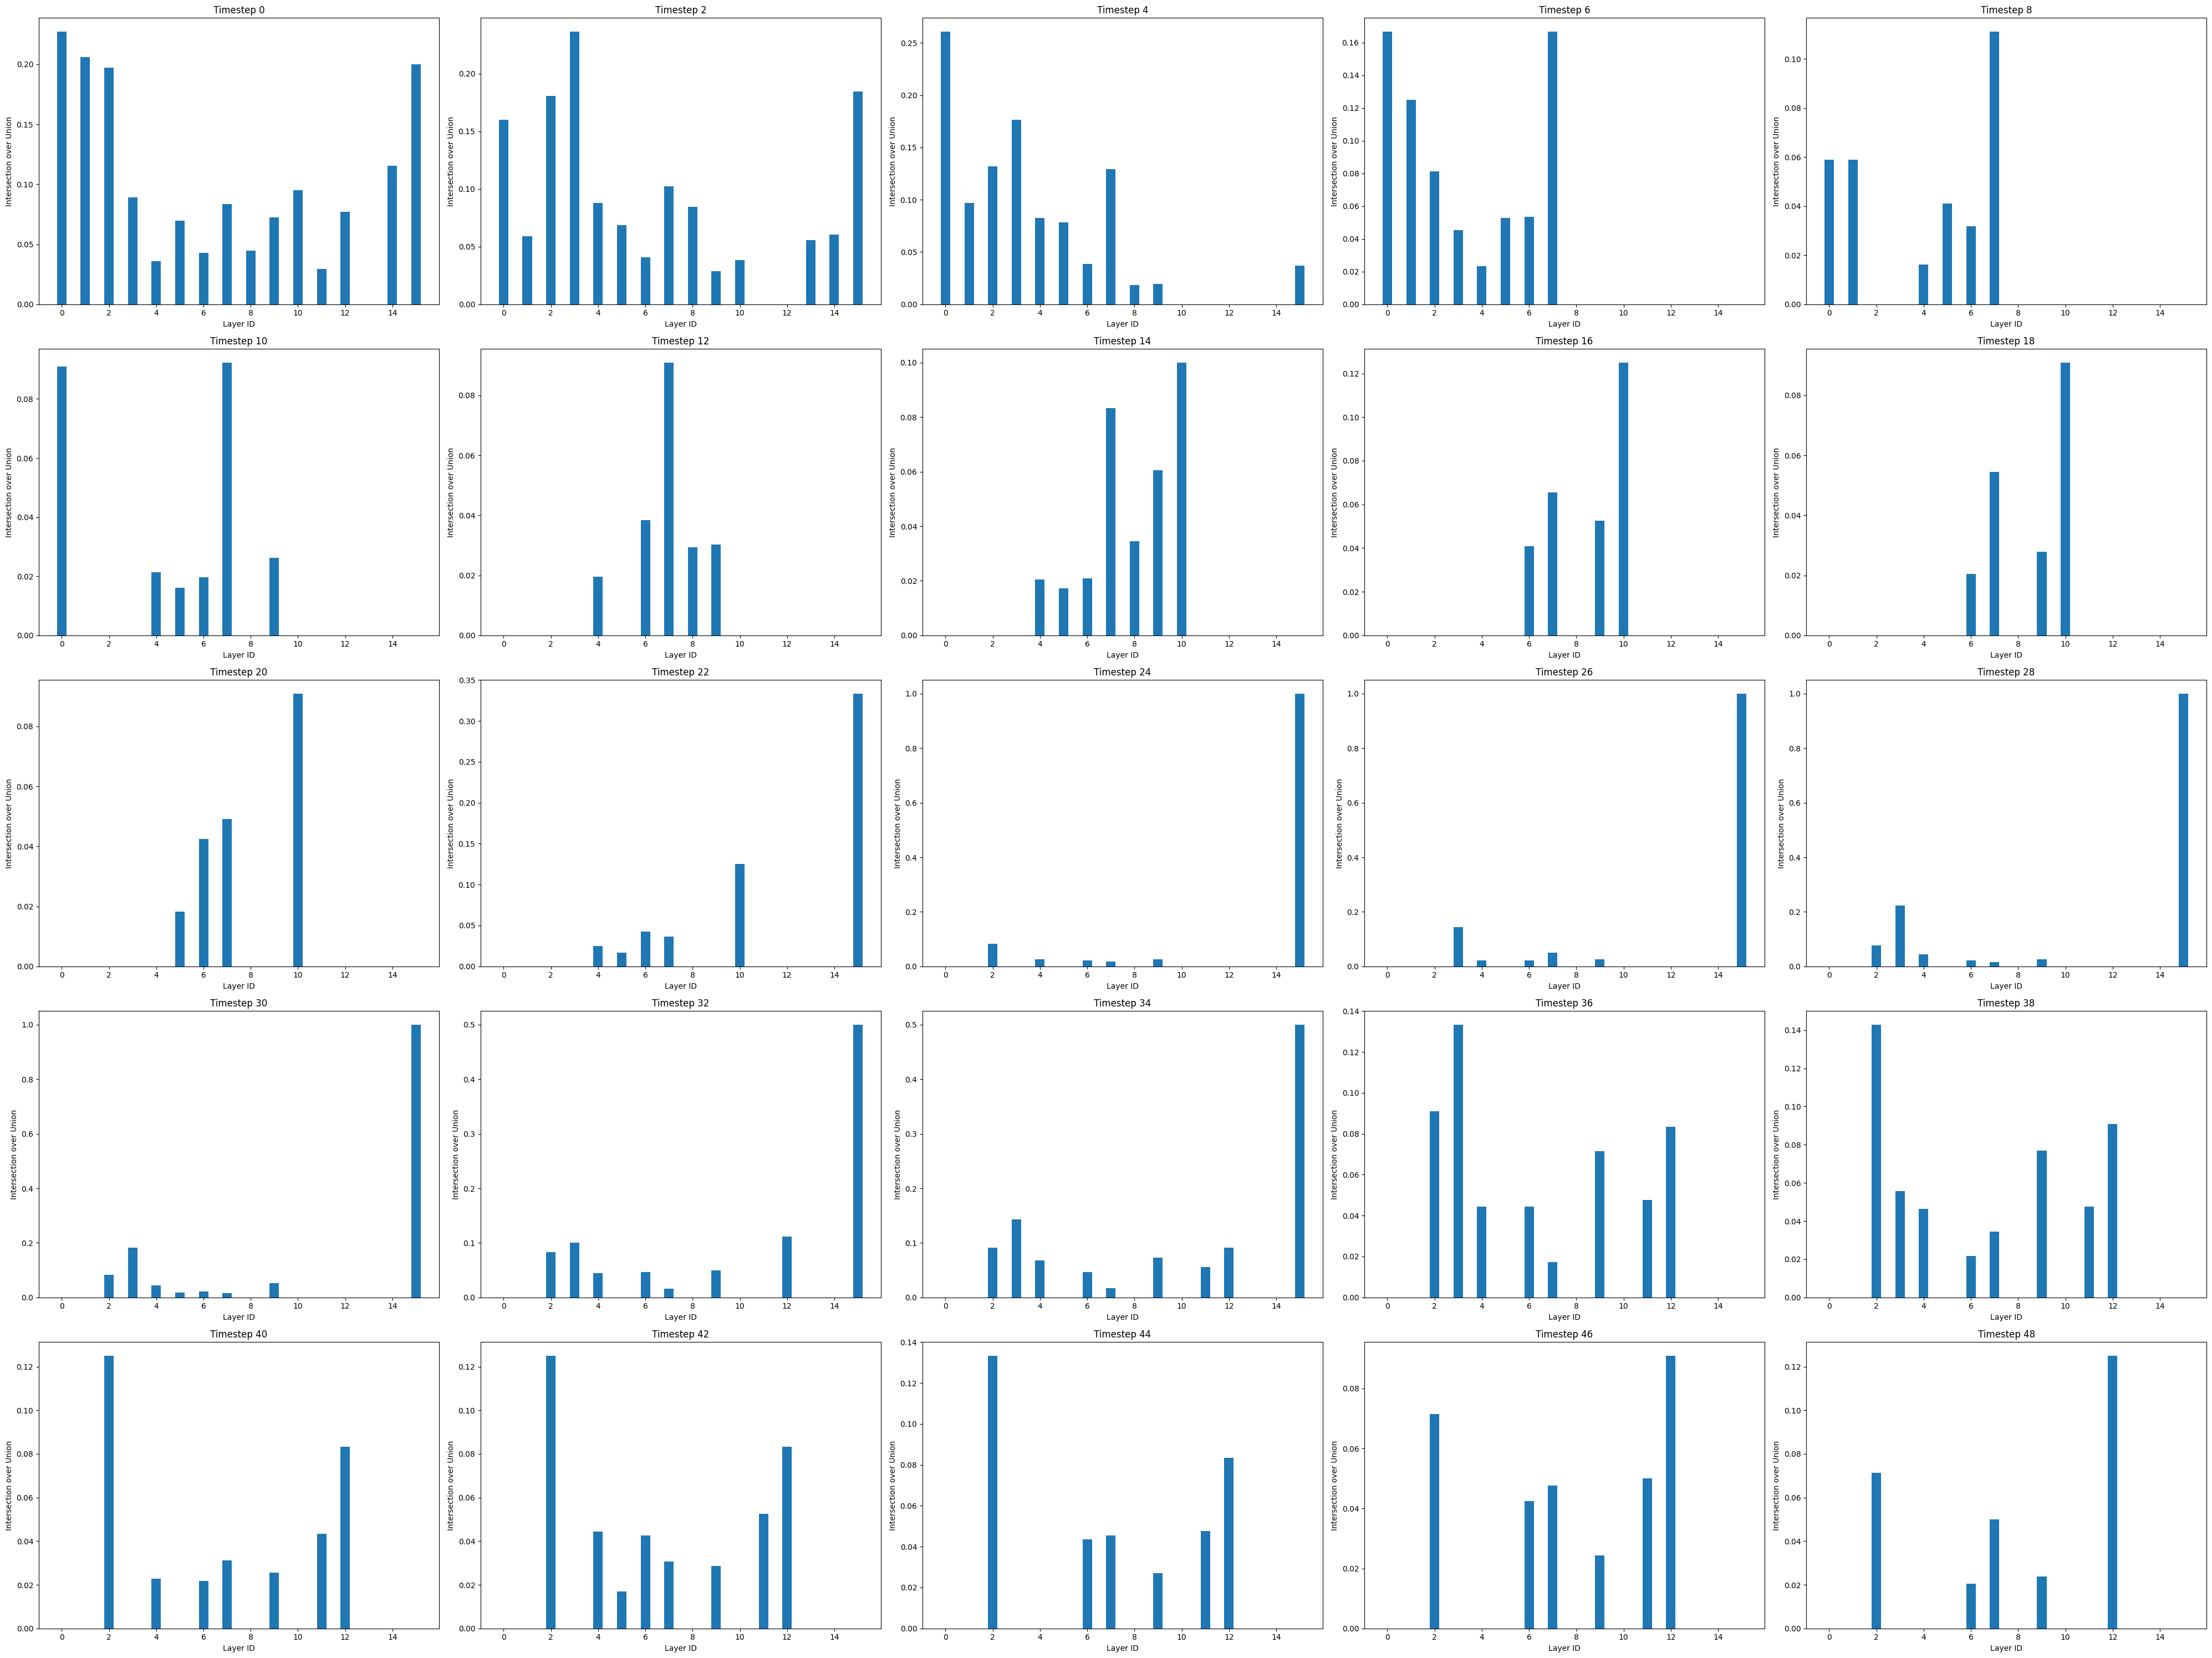

In [31]:
# plot intersection over union of these experts
fig, axes = plt.subplots(5, len(T)//5, figsize=(40, 30))

# adjust space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
for t in T:
    n_experts = []
    for l in range(n_layers):
        if len(union[t][l]) == 0:
            n_experts.append(0)
        else:
            n_experts.append(len(intersection[t][l])/len(union[t][l]))
    axes[T.index(t)//5, T.index(t)%5].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
    # set title
    axes[T.index(t)//5, T.index(t)%5].set_title(f'Timestep {t}')
    axes[T.index(t)//5, T.index(t)%5].set_xlabel('Layer ID')
    axes[T.index(t)//5, T.index(t)%5].set_ylabel('Intersection over Union')
    # sjift the next bar

plt.tight_layout()
plt.savefig('intersection_over_union.png')
    

In [10]:
# save the intersection of these experts
print("Saving the intersection of the experts")
adjective = ",".join(concepts)
ratios_str = "_".join([str(r) for r in ratio])
root = f'../results/results_seed_{seed}/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/{adjective}/{test_name}_intersection/{ratios_str}/'
if not os.path.exists(root):
    os.makedirs(root)
for t in range(timesteps):
    for l in range(n_layers):
        
        path = os.path.join(root, f'timestep_{t}_layer_{l}.json')
        print(f"Saving timestep {t} layer {l} to {path}")
        with open(path, 'w') as f:
            json.dump(list(intersection[t][l]), f)


Saving the intersection of the experts
Saving timestep 0 layer 0 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_intersection/0.3_0.3/timestep_0_layer_0.json
Saving timestep 0 layer 1 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_intersection/0.3_0.3/timestep_0_layer_1.json
Saving timestep 0 layer 2 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_intersection/0.3_0.3/timestep_0_layer_2.json
Saving timestep 0 layer 3 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_intersection/0.3_0.3/timestep_0_layer_3.json
Saving timestep 0 layer 4 to ../results/results_seed_0/st

In [11]:
# save union  of the experts
print("Saving the union of the experts")
adjective = ",".join(concepts)
ratios_str = "_".join([str(r) for r in ratio])
root = f'../results/results_seed_{seed}/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/{adjective}/{test_name}_union/{ratios_str}/'
if not os.path.exists(root):
    os.makedirs(root)
for t in range(timesteps):
    for l in range(n_layers):
        
        path = os.path.join(root, f'timestep_{t}_layer_{l}.json')
        print(f"Saving timestep {t} layer {l} to {path}")
        with open(path, 'w') as f:
            json.dump(list(union[t][l]), f)

Saving the union of the experts
Saving timestep 0 layer 0 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_union/0.3_0.3/timestep_0_layer_0.json
Saving timestep 0 layer 1 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_union/0.3_0.3/timestep_0_layer_1.json
Saving timestep 0 layer 2 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_union/0.3_0.3/timestep_0_layer_2.json
Saving timestep 0 layer 3 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_expert_t_test_expert_union/0.3_0.3/timestep_0_layer_3.json
Saving timestep 0 layer 4 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runw

In [95]:
# initialise arguments
concepts = ['under a tree', 'naked']
test_name = 'skilled_neuron_t_test'
ratios = [0.4, 0.6]
seed = 0
root = f'../results/results_seed_{seed}/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/%s/{test_name}/%s/'
timesteps = 51
n_layers = 16

In [96]:
# read data for all concepts
all_concept_data = {}
print("Reading all the data")
for iter, c in enumerate(concepts):
    # read data
    all_concept_data[c] = {}
    for t in range(timesteps):
        all_concept_data[c][t] = {}
        for l in range(n_layers):
            # read data
            path = os.path.join(root % (c, ratios[iter]), f'timestep_{t}_layer_{l}.json')
            with open(path, 'r') as f:
                data = json.load(f)
                all_concept_data[c][t][l] = data


Reading all the data


Plotting the number of experts for each concept
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


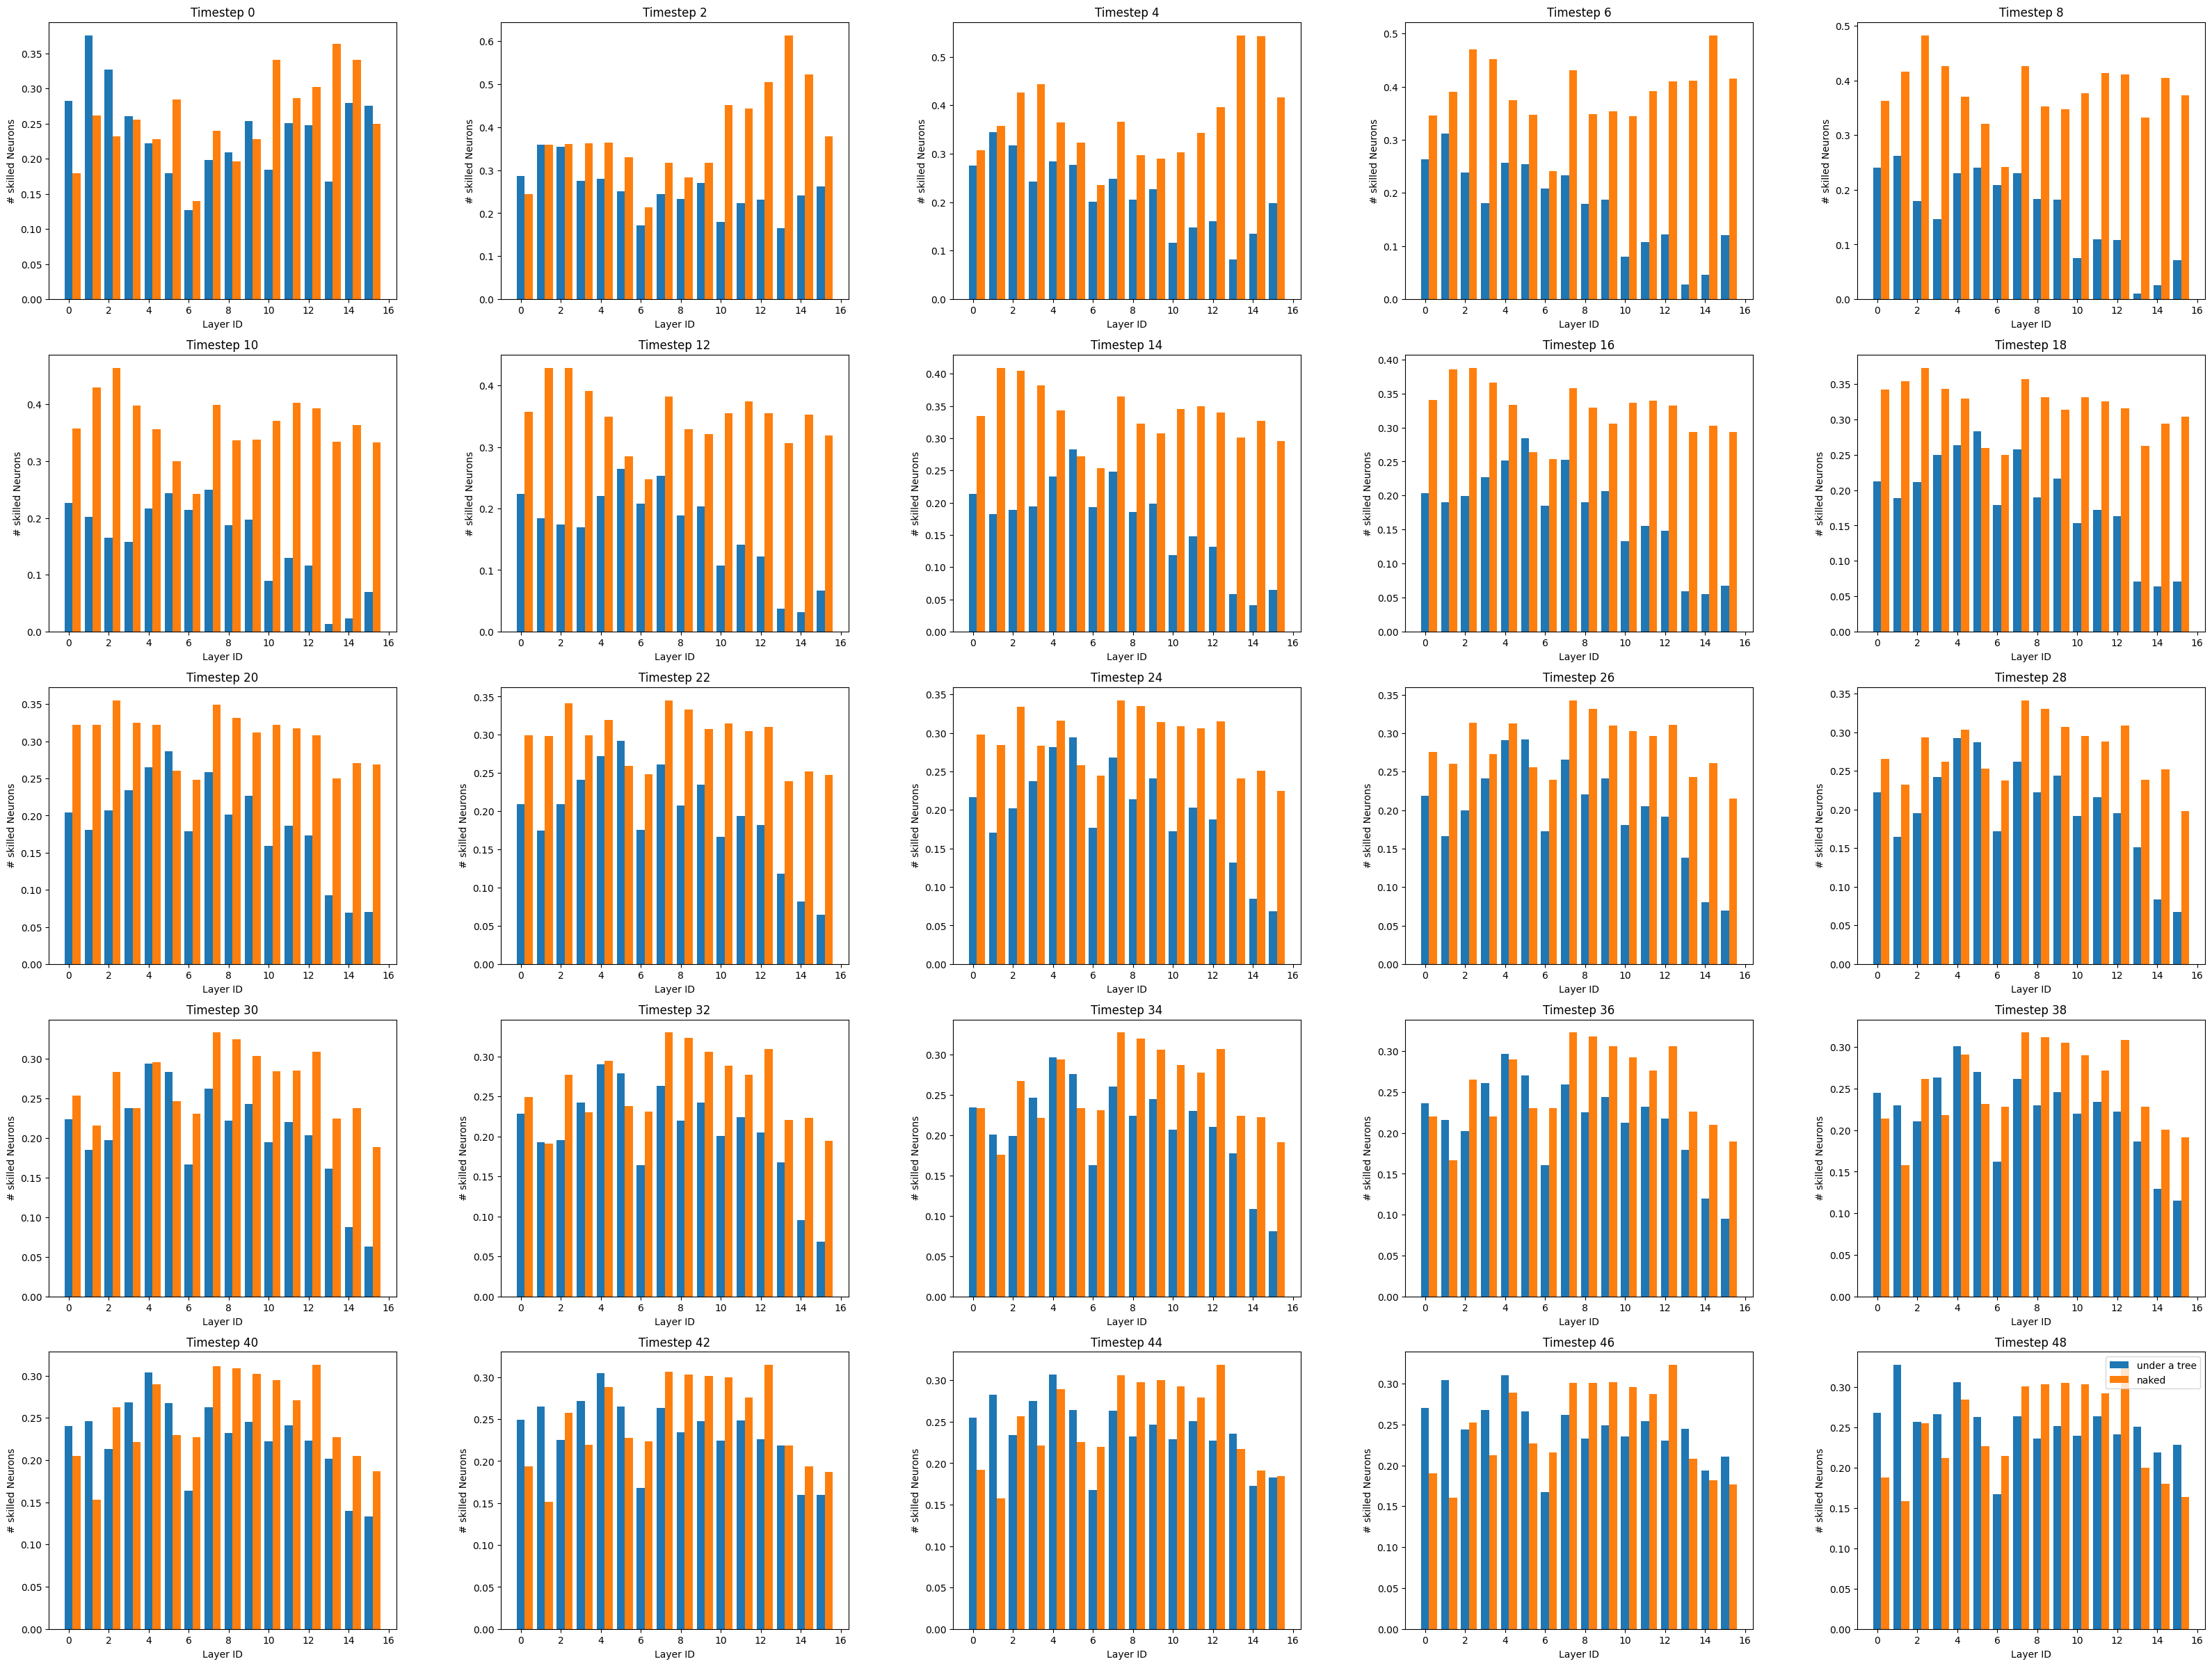

In [97]:
# plot the number of neruons for each concept
print("Plotting the number of experts for each concept")
import matplotlib.pyplot as plt
T = np.arange(0, timesteps-1, 2).tolist()
print(T)
fig, axes = plt.subplots(5, len(T)//5, figsize=(40, 30))
# adjust space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
for c in concepts:
    
    for t in T:
        n_experts = []
        for l in range(n_layers):
            # indices where the neuron is active
            
            indx = np.where(np.array(all_concept_data[c][t][l]) == 1)[0]
            n_experts.append(len(indx)/(num_experts_per_layer[l] * 20))
        axes[T.index(t)//5, T.index(t)%5].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
        # set title
        axes[T.index(t)//5, T.index(t)%5].set_title(f'Timestep {t}')
        axes[T.index(t)//5, T.index(t)%5].set_xlabel('Layer ID')
        axes[T.index(t)//5, T.index(t)%5].set_ylabel('# skilled Neurons')
    # space += 0.6
        # sjift the next bar
    space += 0.4

plt.legend()
# plot the number of experts for each concept
    # plt.bar(np.arange(n_layers) + space, n_experts, label=c)
    # space += 0.4

In [80]:
# calculate the neurons for each concept and their itersection
print("Finding the intersection of the neurons")
intersection = {}
intersection_indx = {}

for t in range(timesteps):
    intersection[t] = {}
    intersection_indx[t] = {}
    for l in range(n_layers):
        # find the intersection of the experts
        neurons_0 = all_concept_data[concepts[0]][t][l]
        neurons_1 = all_concept_data[concepts[1]][t][l]
        add = np.array(neurons_0) + np.array(neurons_1)
        intersection_indx[t][l] = np.where(add >= 1)[0]
        intersection[t][l] = add >= 1


# plot the number of experts for each concept
print("Plotting the number of experts for each concept")
fig, axes = plt.subplots(1, len(T), figsize=(30, 5))
# add space between the plots
plt.subplots_adjust(wspace=0.3)
space = 0
# for c in concepts:
for t in T:
    n_experts = []
    for l in range(n_layers):
        n_experts.append(len(intersection_indx[t][l])/(num_experts_per_layer[l] * 20))
    axes[T.index(t)].bar(np.arange(n_layers) + space, n_experts, label=c, width=0.4)
    # set title
    axes[T.index(t)].set_title(f'Timestep {t}')
    axes[T.index(t)].set_xlabel('Layer ID')
    axes[T.index(t)].set_ylabel('skilled neurons in total')




    # sjift the next bar



Finding the intersection of the neurons


ValueError: operands could not be broadcast together with shapes (5,) (20,) 

In [127]:
# save intersection
print("Saving the intersection of the neurons")
adjective = ",".join(concepts)
root = f'../results/results_seed_{seed}/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/{adjective}/{test_name}/{ratio}/'
if not os.path.exists(root):
    os.makedirs(root)
for t in range(timesteps):
    for l in range(n_layers):
        
        path = os.path.join(root, f'timestep_{t}_layer_{l}.json')
        print(f"Saving timestep {t} layer {l} to {path}")
        intersection[t][l] = list(intersection[t][l])
        intersection[t][l] = [int(i) for i in intersection[t][l]]
        with open(path, 'w') as f:
            json.dump(list(intersection[t][l]), f)

Saving the intersection of the neurons
Saving timestep 0 layer 0 to ../results/results_seed_0/stable-diffusion/fine-tuned-relu/runwayml/stable-diffusion-v1-5/modularity/under a tree,painting/skilled_neuron_t_test/0.2/timestep_0_layer_0.json
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,